# SPAM or HAM Filter



In [107]:


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import model_selection , feature_extraction, naive_bayes , svm , metrics
from sklearn.model_selection import train_test_split
from collections import Counter


%matplotlib inline

In [126]:
data = pd.read_csv("spam.csv" , encoding="latin-1")
data.head(n = 20)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
5,spam,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN
6,ham,Even my brother is not like to speak with me. ...,NaN,NaN,NaN
7,ham,As per your request 'Melle Melle (Oru Minnamin...,NaN,NaN,NaN
8,spam,WINNER!! As a valued network customer you have...,NaN,NaN,NaN
9,spam,Had your mobile 11 months or more? U R entitle...,NaN,NaN,NaN


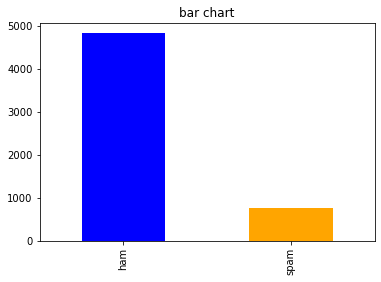

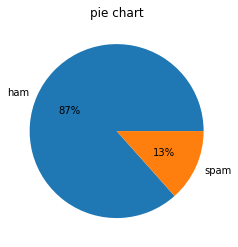

In [109]:
# Plotting the data

count_class = pd.value_counts(data["v1"] , sort = True)
count_class.plot(kind = 'bar' , color = ["blue" ,"orange"])
plt.title("bar chart")
plt.show()

count_class.plot(kind = 'pie'  , autopct = '%1.0f%%')
plt.title("pie chart")
plt.ylabel("")
plt.show()

In [110]:
# text analytics


count1 = Counter(" ".join(data[data['v1'] == 'ham']["v2"]).split() ).most_common(20)
df1 = pd.DataFrame.from_dict(count1).rename(columns = {0:"words in ham"  ,1:"count"})

count2 = Counter(" ".join(data[data['v1'] == 'spam']["v2"]).split() ).most_common(20)
df2 = pd.DataFrame.from_dict(count2).rename(columns = {0:"words in spam"  ,1:"count"})


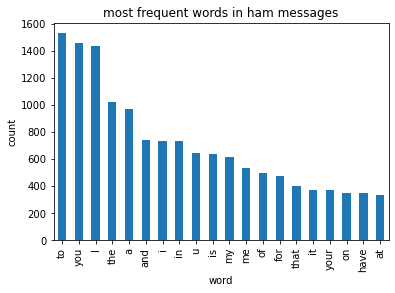

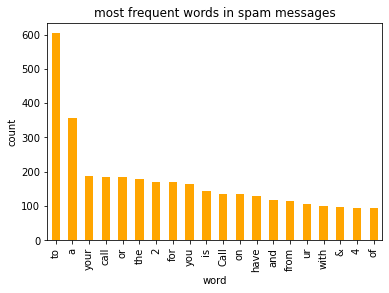

In [111]:

df1.plot(kind = 'bar' , legend = False)
plt.title("most frequent words in ham messages")

y_pos = np.arange(len(df1['words in ham']))
plt.xticks(y_pos , df1['words in ham'])

plt.xlabel("word")
plt.ylabel("count")

plt.show()

df2.plot(kind = 'bar' , legend = False , color = 'orange')
plt.title("most frequent words in spam messages")

y_pos = np.arange(len(df2['words in spam']))
plt.xticks(y_pos , df2['words in spam'])

plt.xlabel("word")
plt.ylabel("count")

plt.show()

In [127]:
# Feature Engineering

f = feature_extraction.text.CountVectorizer(stop_words='english')
X = f.fit_transform(data['v2'])

data['v1'] = data['v1'].map({"spam":1,"ham":0})



xtrain , xtest , ytrain , ytest = train_test_split(X , data['v1'] , test_size = 0.33 , random_state = 42)
data

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,0,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,0,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,0,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,0,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,0,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,0,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,0,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [134]:

# fitting the model

list_alpha = np.arange(1/100000 , 20 , 0.11)
sz = len (list_alpha)

score_train = np.zeros(sz)
score_test = np.zeros(sz)
recall_test = np.zeros(sz)
precision_test = np.zeros(sz)

count = 0 

for alpha in list_alpha:
    bayes = naive_bayes.MultinomialNB(alpha=alpha)
    bayes.fit(xtrain , ytrain)
    score_train[count] = bayes.score(xtrain , ytrain)
    score_test[count] = bayes.score(xtest , ytest)
    
    recall_test[count] = metrics.recall_score(ytest , bayes.predict(xtest))
    precision_test[count] = metrics.precision_score(ytest , bayes.predict(xtest))
    count += 1


In [159]:
# declaring the winner model

matrix = np.matrix( np.c_[list_alpha , score_train,score_test,recall_test,precision_test] )

models = pd.DataFrame(data = matrix , columns = ["alpha" , "Train Accuracy", "Test Accuracy" ,"Test Recall" ,"Test Precision"])

best_score = models["Test Precision"].max()
best_model = models["Test Precision"].idxmax()
best_model = models[ models["Test Precision"] == best_score ]["Test Accuracy"].idxmax()

bayes = naive_bayes.MultinomialNB(alpha = list_alpha[best_model])
bayes.fit(xtrain , ytrain)


m_confusion_test = metrics.confusion_matrix(ytest , bayes.predict(xtest) )
pd.DataFrame(data = m_confusion_test , columns = ["Precicted 0" ,"Predicted 1"] , index = ["Actual 0" , "Actual 1"])



,Precicted 0,Predicted 1
Actual 0,1587,0
Actual 1,56,196


In [177]:
# Support Vector Machine


list_C = np.arange(500 , 2000 , 100)
sz = len (list_C)

score_train = np.zeros(sz)
score_test = np.zeros(sz)
recall_test = np.zeros(sz)
precision_test = np.zeros(sz)

count = 0 
for C in list_C:
    svc = svm.SVC(C=C)
    svc.fit(xtrain , ytrain)
    score_train[count] = svc.score(xtrain , ytrain)
    score_test[count] = svc.score(xtest , ytest)
    
    recall_test[count] = metrics.recall_score(ytest , svc.predict(xtest))
    precision_test[count] = metrics.precision_score(ytest , svc.predict(xtest))
    count += 1
print("done")

done


In [179]:
matrix = np.matrix( np.c_[list_C , score_train,score_test,recall_test,precision_test] )

models = pd.DataFrame(data = matrix , columns = ["alpha" , "Train Accuracy", "Test Accuracy" ,"Test Recall" ,"Test Precision"])

best_score = models["Test Precision"].max()
best_model = models["Test Precision"].idxmax()
best_model = models[ models["Test Precision"] == best_score ]["Test Accuracy"].idxmax()

svc = svm.SVC(C=list_C[best_model])
svc.fit(xtrain , ytrain)


m_confusion_test = metrics.confusion_matrix(ytest , svc.predict(xtest) )
pd.DataFrame(data = m_confusion_test , columns = ["Precicted 0" ,"Predicted 1"] , index = ["Actual 0" , "Actual 1"])



,Precicted 0,Predicted 1
Actual 0,1586,1
Actual 1,37,215
